<a href="https://colab.research.google.com/github/chirag20019/ML_Programs/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Summary:
        Prev Close         Open         High          Low         Last  \
count  3322.000000  3322.000000  3322.000000  3322.000000  3322.000000   
mean    344.114314   344.763019   351.608007   337.531969   344.239539   
std     192.936882   193.619992   198.617808   188.676614   193.187813   
min     108.000000   108.000000   110.450000   105.650000   108.000000   
25%     164.312500   164.850000   168.000000   161.600000   164.075000   
50%     324.700000   325.750000   331.275000   319.850000   325.000000   
75%     400.912500   401.000000   407.187500   395.000000   400.912500   
max    1307.450000  1310.250000  1324.000000  1270.000000  1308.000000   

             Close         VWAP        Volume      Turnover        Trades  \
count  3322.000000  3322.000000  3.322000e+03  3.322000e+03  3.322000e+03   
mean    344.201626   344.853182  2.954564e+06  1.070144e+14  4.492259e+04   
std     193.045886   193.841305  4.104227e+06  2.625564e+14  4.318821e+04   
min     

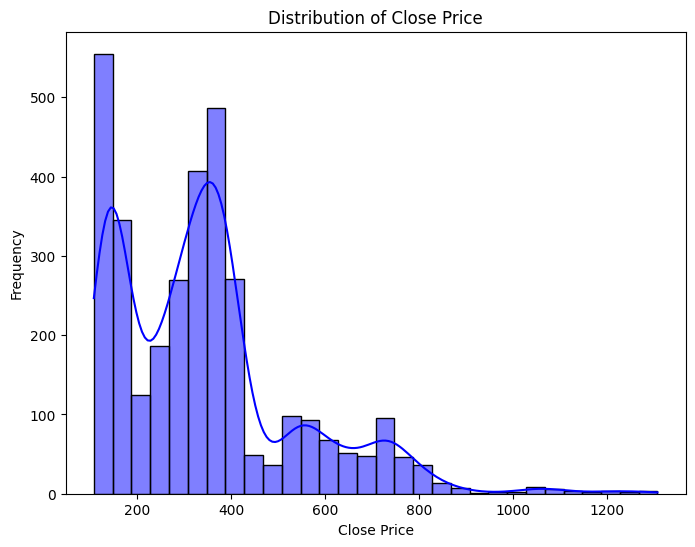

Cross-Validation Accuracy Scores: [0.97932331 0.96992481 0.96233522 0.96610169 0.96610169]
Mean CV Accuracy: 0.97

Model Performance:
Accuracy: 0.97
Confusion Matrix:
[[315   7]
 [ 10 333]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       322
           1       0.98      0.97      0.98       343

    accuracy                           0.97       665
   macro avg       0.97      0.97      0.97       665
weighted avg       0.97      0.97      0.97       665



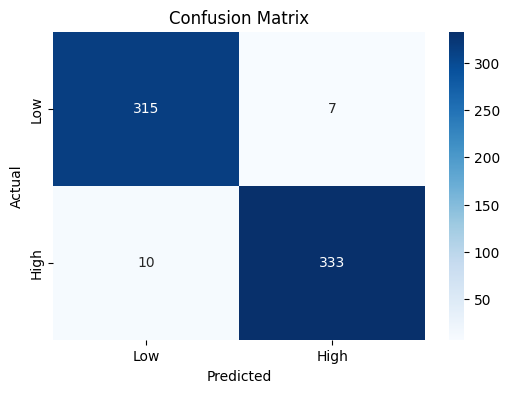

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('Adaniports.csv')

# Drop unnecessary columns
data = data.drop(columns=['Date', 'Symbol', 'Series'])

# Handle missing values by filling with the mean of the column
data['Trades'] = data['Trades'].fillna(data['Trades'].mean())

# EDA: Summary statistics
print("Dataset Summary:")
print(data.describe())

# EDA: Visualize the distribution of the 'Close' price
plt.figure(figsize=(8, 6))
sns.histplot(data['Close'], kde=True, bins=30, color='blue')
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# Create a classification target (High/Low Close Price)
threshold = data['Close'].median()
data['Close_Category'] = np.where(data['Close'] >= threshold, 1, 0)  # 1 = High, 0 = Low

# Define features (X) and target (y)
X = data.drop(columns=['Close', 'Close_Category'])
y = data['Close_Category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
